DataFrame

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
# Load data
melbourne_file_path = '../df/Melbourne_housing_extra_data-18-08-2017.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 

# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
melbourne_df = pd.DataFrame(filtered_melbourne_data)
'''
train = filtered_melbourne_data
train = train.drop('Price', axis = 1)

target = filtered_melbourne_data['Price']
'''

#matrix_melbourne = filtered_melbourne_data.as_matrix
# Choose target and predictors
#melbourne_target = filtered_melbourne_data.Price
#melbourne_predictors = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
#                        'YearBuilt', 'Lattitude', 'Longtitude']
#melbourne_predictors_data = filtered_melbourne_data[melbourne_predictors]
#dir(pd.data)


"\ntrain = filtered_melbourne_data\ntrain = train.drop('Price', axis = 1)\n\ntarget = filtered_melbourne_data['Price']\n"

In [6]:
le = preprocessing.LabelEncoder()
le.fit(list(melbourne_df["Type"]))
new_type = le.transform(list(melbourne_df["Type"]))

melbourne_df["new_type"] = new_type

In [7]:

le.fit(list(melbourne_df["Method"]))
new_method = le.transform(list(melbourne_df["Method"]))
melbourne_df["new_method"] = new_method

**xgboost**

In [9]:
import xgboost as xgb
#dtrain = xgb.DMatrix(matrix_melbourne)
#params : dict
#        Booster params.
#    dtrain : DMatrix
#        Data to be trained.
'''
xgtrain = xgb.DMatrix(train.values, target.values)
bst = xgb

model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
print(model)
'''


'\nxgtrain = xgb.DMatrix(train.values, target.values)\nbst = xgb\n\nmodel = xgboost.XGBClassifier()\nmodel.fit(X_train, y_train)\nprint(model)\n'

In [10]:
from sklearn.cross_validation import train_test_split
import time
all_Data = melbourne_df.drop(["Postcode","Price","Suburb","Address","Type","Method","SellerG","Date","CouncilArea","Regionname","Lattitude","Longtitude"],axis=1)
X = all_Data
y = melbourne_df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
#dir(xgb.XGBClassifier)

In [38]:
'''
start = time.time()
model = xgb.XGBClassifier(max_depth = 5,subsample = 0.8, colsample_bytree = 0.8)
model.fit(X_train, y_train)
print(model)
end = time.time()
print(end-start)
'''

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)
838.077212095


In [23]:
start = time.time()
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
            'max_depth': 6,'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,'eval_metric': 'rmse', 'objective': 'reg:linear'}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(xgb_pars, dtrain)
#model.fit(X_train, y_train)
#print(model)
end = time.time()
#print(end-start)
print("R square : ",xgb_model.score(X_test, y_test))

y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]
print("RMSE : ",np.sqrt(mean_squared_error(y_test, predictions)))
#print('Modeling RMSLE %.5f' % model.best_score)
#print(model.score(X_test, y_test))


R square :  0.635898625357
RMSE :  447024.165126


In [ ]:
xgb.plot_importance(model)
xgb.plot_tree(model)

In [24]:
#XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score
start = time.time()
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
            'max_depth': 6,'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,'eval_metric': 'rmse', 'objective': 'reg:linear'}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
xgb_model = xgb.XGBRegressor().fit(X_train,y_train)
#model.fit(X_train, y_train)
#print(model)
end = time.time()
#print(end-start)
#print('Modeling RMSLE %.5f' % model.best_score)

print("R square : ",xgb_model.score(X_test, y_test))

y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]
print("RMSE : ",np.sqrt(mean_squared_error(y_test, predictions)))
'''
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(mean_squared_error(actuals, predictions))
'''

R square :  0.635898625357
RMSE :  447024.165126


'\nkf = KFold(n_splits=2, shuffle=True, random_state=rng)\nfor train_index, test_index in kf.split(X):\n    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])\n    predictions = xgb_model.predict(X[test_index])\n    actuals = y[test_index]\n    print(mean_squared_error(actuals, predictions))\n'

In [1]:
#help(xgb.XGBRegressor.score)
#help(model.get_fscore)
#help(model.get_score)
#model.get_score()

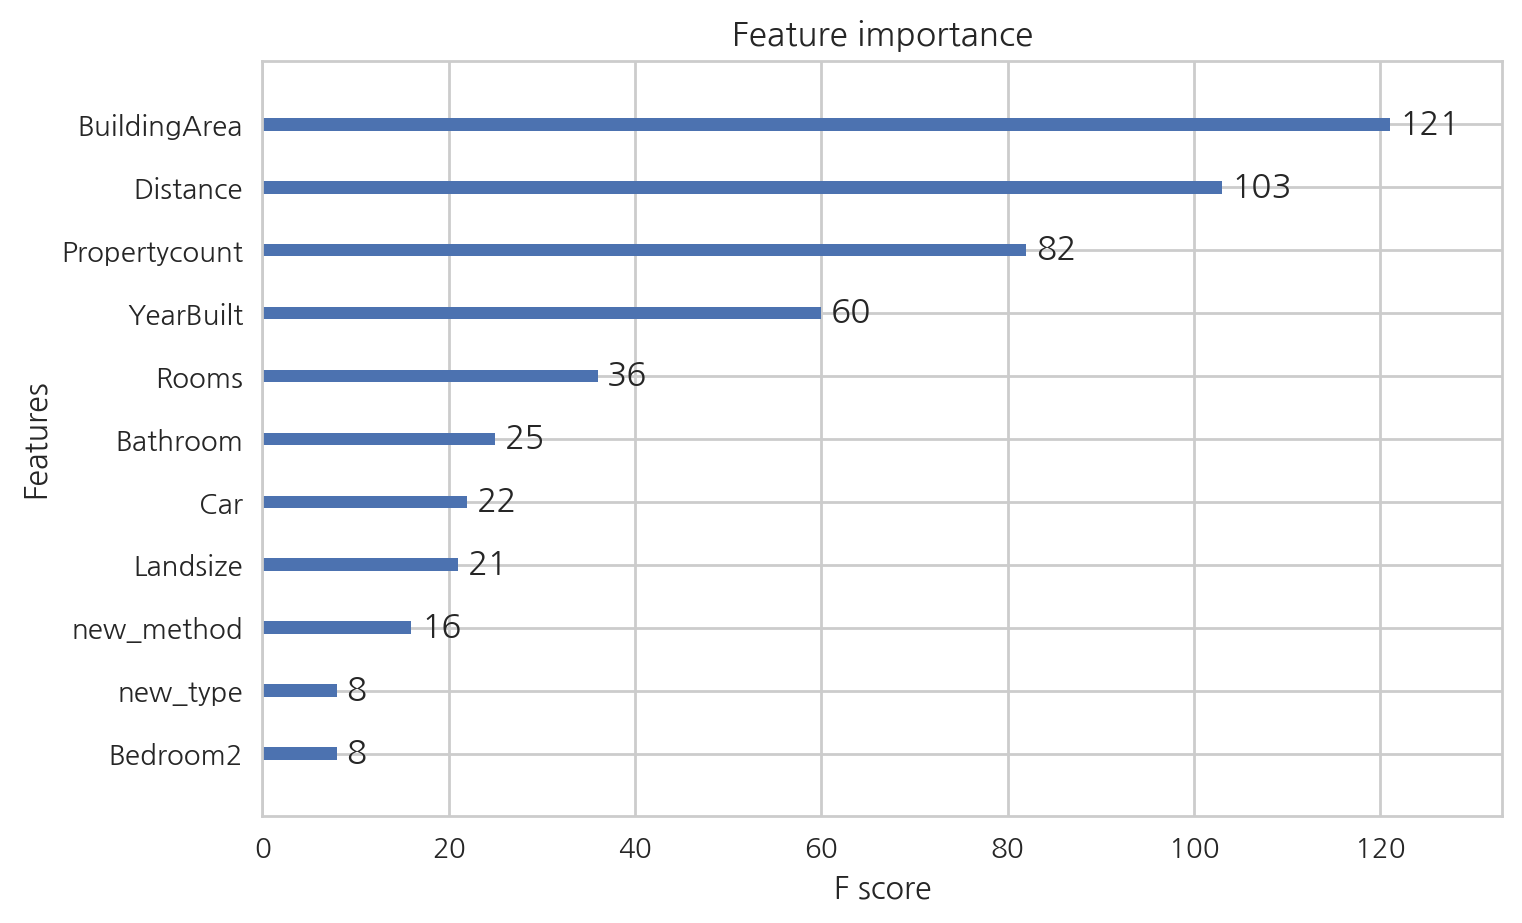

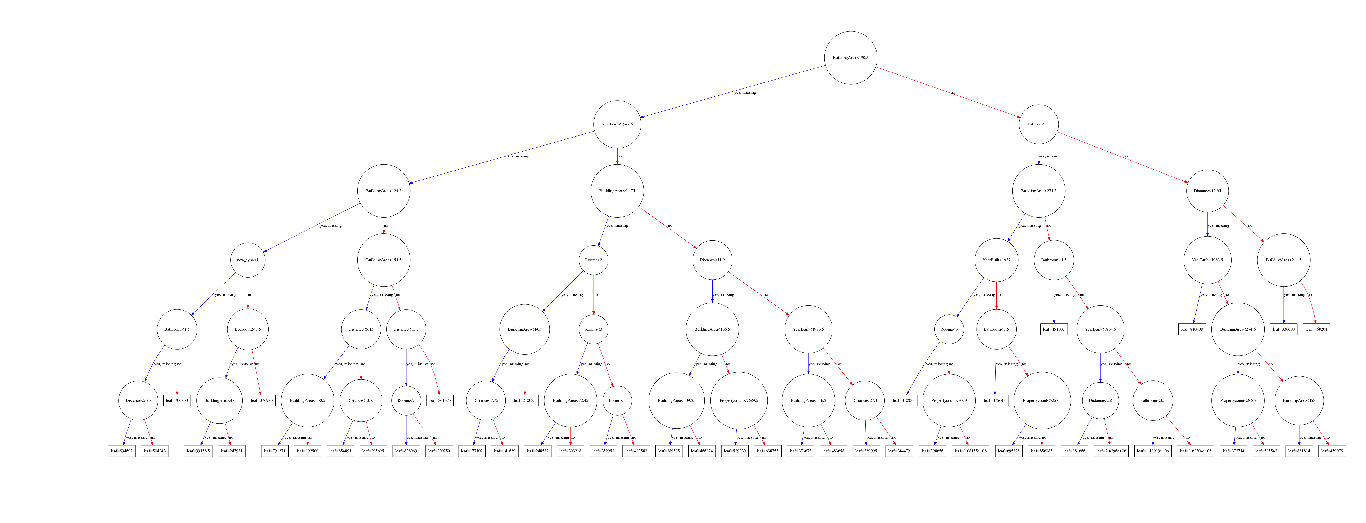

In [14]:
xgb.plot_importance(model)
xgb.plot_tree(model)

Adaboost

In [25]:
#dir(AdaBoostRegressor)
#help(AdaBoostRegressor.score)

Ada + Decision Tree

In [139]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#rng = np.random.RandomState(0)
for i in range(0, 10) :
    adaReg = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=300, random_state=rng, learning_rate = (i+1)/10)
    adaReg.fit(X_train, y_train)

#help(AdaBoostRegressor.fit)

#    pred = adaReg.predict(X_test)
    
    print("eta : ",(i+1)/10, "R square : ",adaReg.score(X_test, y_test))
#eta = 0.3 --> R^2 : 0.65179106687863642

eta :  0.1 R square :  0.644485154031
eta :  0.2 R square :  0.647094326473
eta :  0.3 R square :  0.650828307809
eta :  0.4 R square :  0.653306306023
eta :  0.5 R square :  0.650081629204
eta :  0.6 R square :  0.650089814939
eta :  0.7 R square :  0.649270471323
eta :  0.8 R square :  0.655161570052
eta :  0.9 R square :  0.653505136041
eta :  1.0 R square :  0.655948737895


In [151]:
from sklearn.metrics import mean_squared_error
dir(adaReg)
pred = adaReg.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))


434541.67569449148

Ada + SVM (안됨)

In [ ]:
'''
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
#rng = np.random.RandomState(0)
adaReg = AdaBoostRegressor(base_estimator=SVC(random_state=1), n_estimators=300, learning_rate = 1)
adaReg.fit(X_train, y_train)

#help(AdaBoostRegressor.fit)

#    pred = adaReg.predict(X_test)
adaReg.score(X_test, y_test)
   # print("eta : ",(i+1)/10, "R square : ",adaReg.score(X_test, y_test))
#eta = 0.3 --> R^2 : 0.65179106687863642
'''